# Explore here

In [41]:
import pandas as pd

df = pd.read_csv('/workspaces/machine-learning-python-template3/data/raw/medical_insurance_cost.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   sex_n     1338 non-null   int64  
 8   smoker_n  1338 non-null   int64  
 9   region_n  1338 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 104.7+ KB


Categorical Analysis

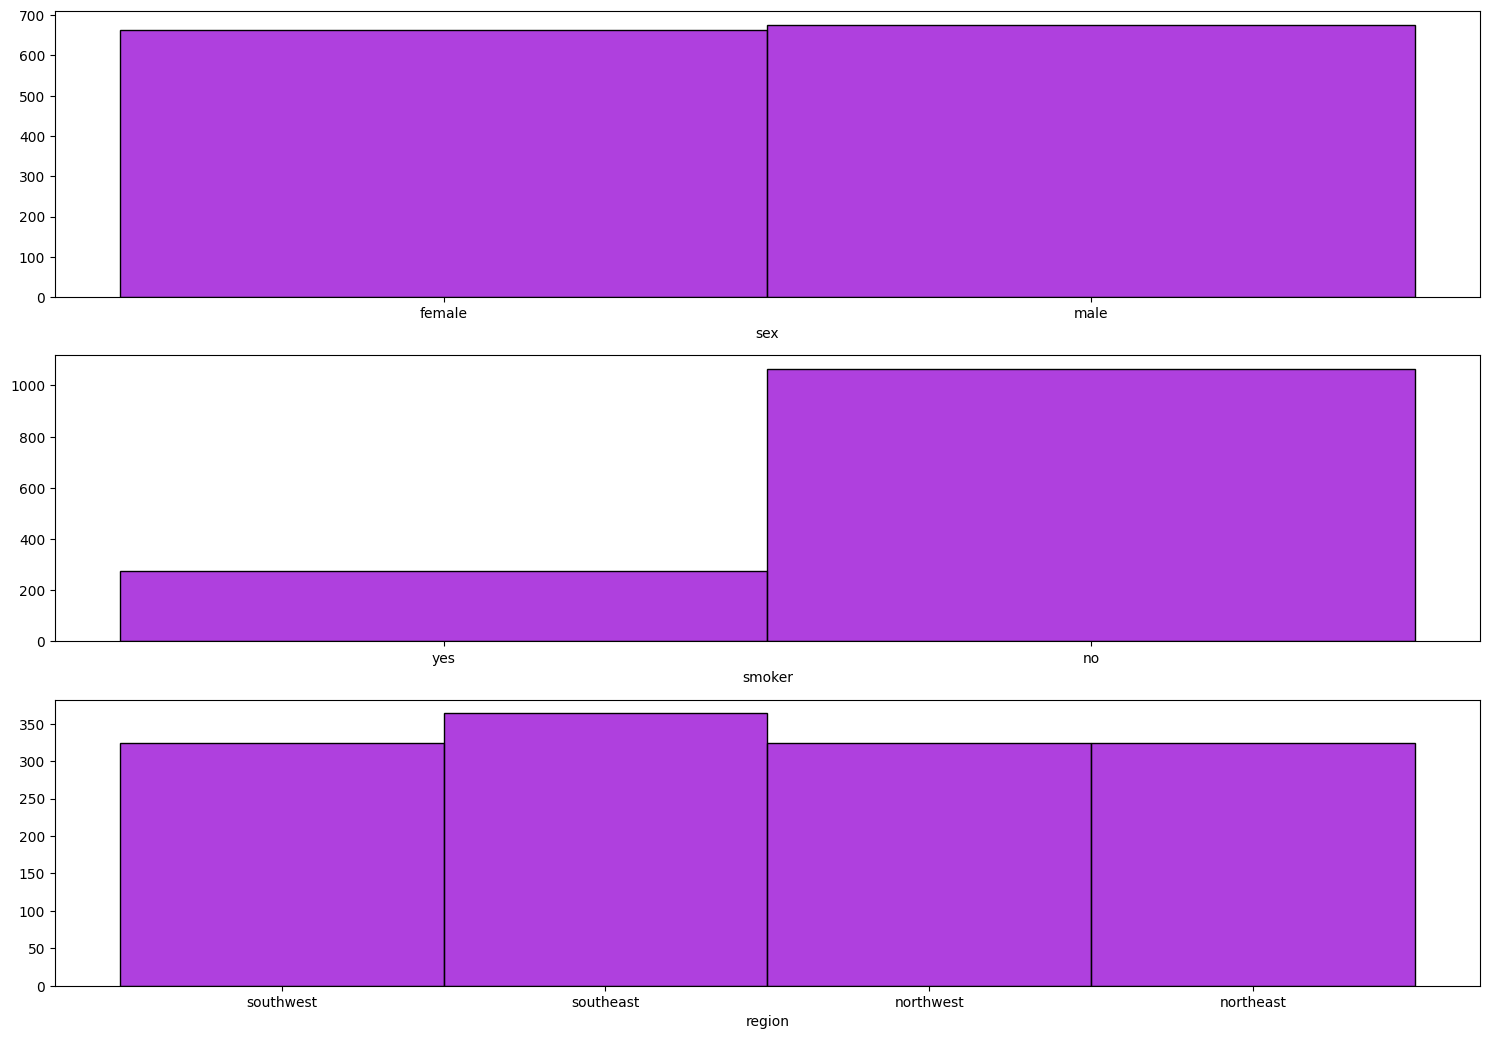

In [180]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 1, figsize = (15, 10.5))


cols = ['sex', 'smoker', 'region']

for col, ax in zip(cols, axis.ravel()): 
    sns.histplot(ax = ax, data = df, x = col, color = 'darkviolet').set(ylabel = None)



plt.tight_layout()


plt.show()

Most people are non-smokers males.

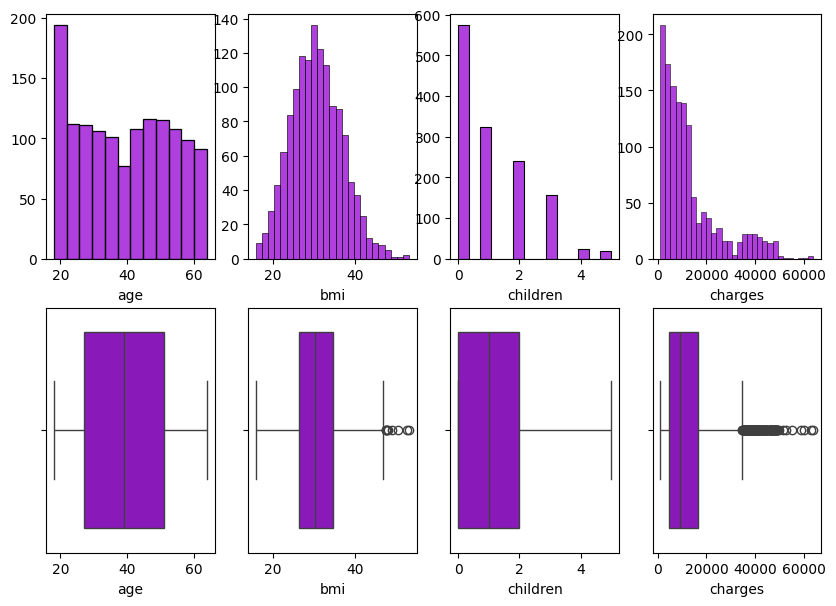

In [181]:
fig, axis = plt.subplots(2, 4, figsize = (10, 7))


x_data = ['age', 'bmi', 'children', 'charges']

for i, col in enumerate(x_data):
    sns.histplot(ax=axis[0, i], data=df, x=col, color='darkviolet').set(ylabel=None)
    sns.boxplot(ax=axis[1, i], data=df, x=col, color='darkviolet')




plt.show()

The most affected variables by outliers are bmi and charges.

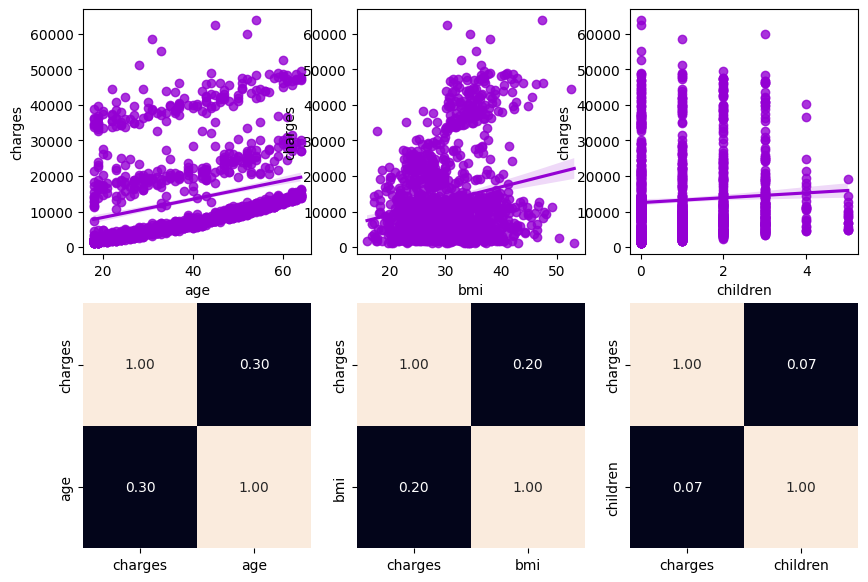

In [182]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))


x_data = ['age', 'bmi', 'children']

for i, col in enumerate(x_data):
    sns.regplot(ax = axis[0, i], data = df, x = col, y = 'charges', color = 'darkviolet')
    sns.heatmap(df[["charges", col]].corr(), annot = True, fmt = ".2f", ax = axis[1, i], cbar = False)




plt.show()

The strongest relationship is between the age and the charge, but it is still quite weak. 

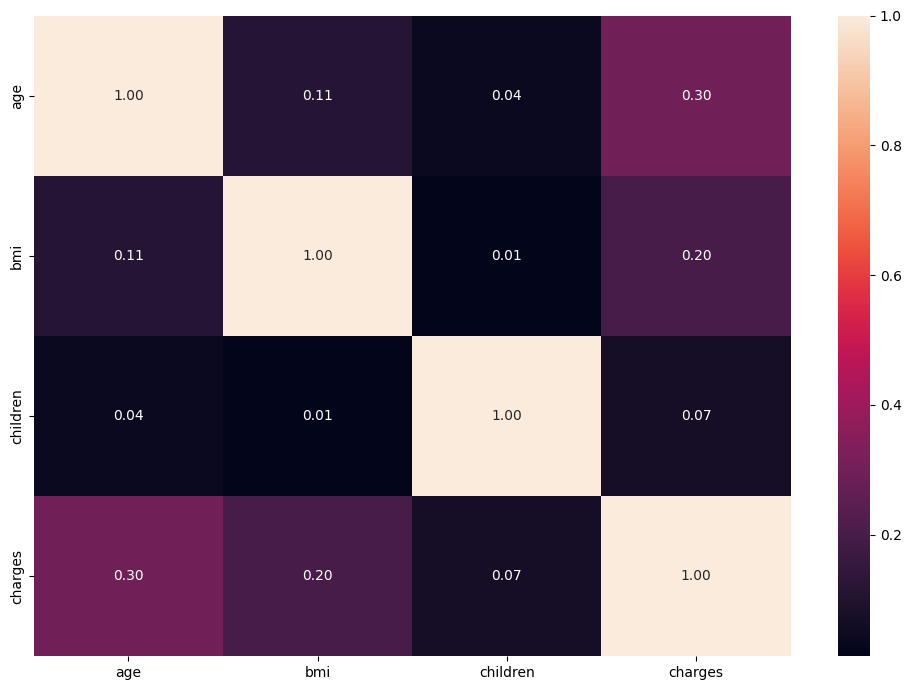

In [183]:
fig, axis = plt.subplots(figsize = (10, 7))

x_data = ['age', 'bmi', 'children', 'charges']

sns.heatmap(df[x_data].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

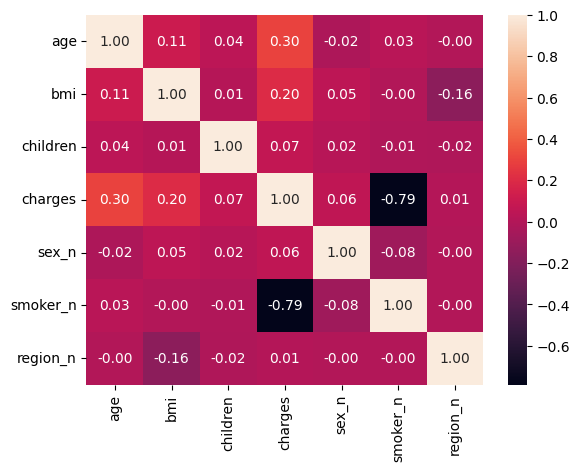

In [184]:
df['sex_n'] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df['region_n'] = pd.factorize(df["region"])[0]



data = ['age', 'bmi', 'children', 'charges', 'sex_n', 'smoker_n', 'region_n']
sns.heatmap(df[data].corr(), annot = True, fmt = ".2f")



plt.show()

Clearly there is a strong relationship between smoking and the targer. If you smoke, it will be more expensive.

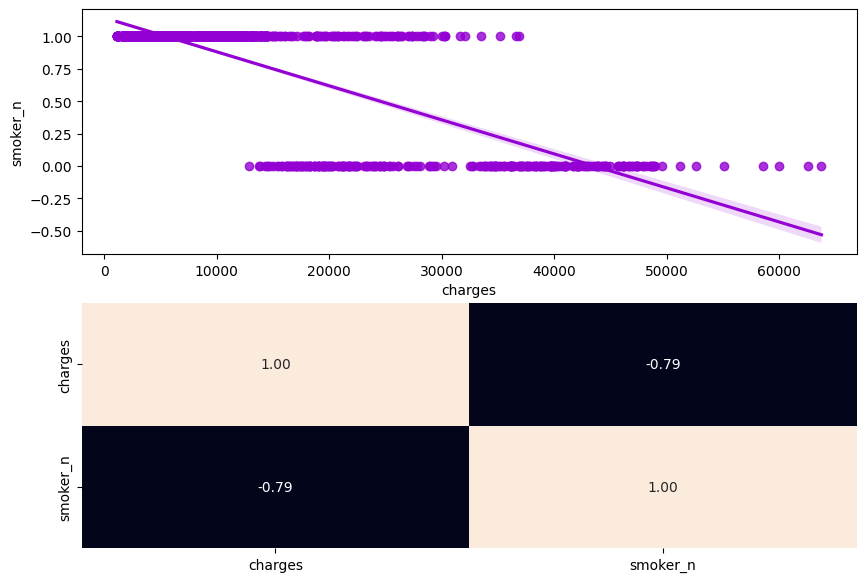

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, figsize=(10, 7))

sns.regplot(ax=axis[0], data=df, x='charges', y='smoker_n', color='darkviolet')
sns.heatmap(df[["charges", 'smoker_n']].corr(), annot=True, fmt=".2f", ax=axis[1], cbar=False)

plt.show()

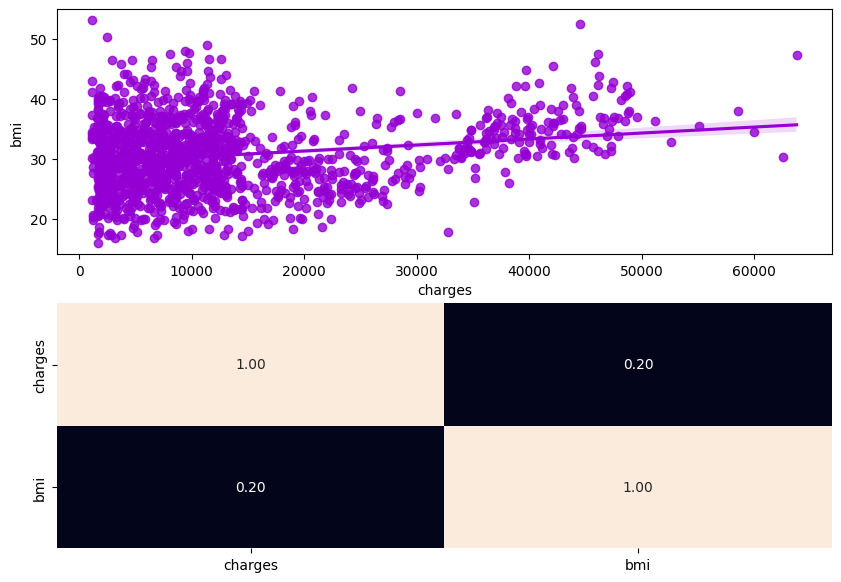

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, figsize=(10, 7))

sns.regplot(ax=axis[0], data=df, x='charges', y='bmi', color='darkviolet')
sns.heatmap(df[["charges", 'bmi']].corr(), annot=True, fmt=".2f", ax=axis[1], cbar=False)

plt.show()

I am not going to do anything with the outliers because I do not think that it is necessary

In [187]:
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split

num_variables = ['age', 'bmi', 'children', 'sex_n', 'smoker_n', 'region_n']

X = df.drop("charges", axis = 1)[num_variables]
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.to_csv("/workspaces/machine-learning-python-template3/data/raw/medical_train_X.csv", index=False)
with open("/workspaces/machine-learning-python-template3/data/raw/medical_train_y.txt", "w") as f:
    f.write(y_train.to_string(index=False))
X_test.to_csv("/workspaces/machine-learning-python-template3/data/raw/medical_test_X.csv", index=False)
with open("/workspaces/machine-learning-python-template3/data/raw/medical_test_y.txt", "w") as f:
    f.write(y_test.to_string(index=False))
X_train.head()

X_train.head()

,age,bmi,children,sex_n,smoker_n,region_n
560,46,19.95,2,0,1,2
1285,47,24.32,0,0,1,3
1142,52,24.86,0,0,1,1
969,39,34.32,5,0,1,1
486,54,21.47,3,0,1,2


In [188]:
from sklearn.feature_selection import f_regression, SelectKBest

selection_model = SelectKBest(f_regression, k= int(len(X_train.columns) * 0.7))
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,age,bmi,children,smoker_n
0,46.0,19.95,2.0,1.0
1,47.0,24.32,0.0,1.0
2,52.0,24.86,0.0,1.0
3,39.0,34.32,5.0,1.0
4,54.0,21.47,3.0,1.0


In [189]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_sel)

num_variables = ['age', 'bmi', 'children', 'smoker_n']

X_train_norm = scaler.transform(X_train_sel[num_variables])
X_train_norm = pd.DataFrame(X_train_norm, index = X_train_sel.index, columns = num_variables)

X_test_norm = scaler.transform(X_test_sel)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test_sel.index, columns = num_variables)

X_train_norm.head()

,age,bmi,children,smoker_n
0,0.472227,-1.756525,0.734336,0.508747
1,0.543313,-1.033082,-0.911192,0.508747
2,0.898745,-0.943687,-0.911192,0.508747
3,-0.025379,0.622393,3.202629,0.508747
4,1.040918,-1.504893,1.557100,0.508747


In [207]:
X_test_sel = X_test_norm
X_train_sel = X_train_norm
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)



0       9095.06825
1       5272.17580
2      29330.98315
3       9301.89355
4      33750.29180
          ...     
263    47055.53210
264    12222.89830
265     6067.12675
266    63770.42801
267     9872.70100
Name: charges, Length: 268, dtype: float64

In [191]:
X_train_sel.to_csv("/workspaces/machine-learning-python-template3/data/processed/slected_medicine_train.csv", index=False)
X_test_sel.to_csv("/workspaces/machine-learning-python-template3/data/processed/selected_medicine_test.csv", index=False)

In [202]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_sel.drop(['charges'], axis=1), X_train_sel["charges"])

LinearRegression()

In [203]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

Intercept (a): 13346.089736364485
Coefficients (b): [ 3616.31817628  1978.4204322    519.22528737 -9559.32315794]


There are multiple b coefficients because the linear regression is multiple.    

In [211]:
y_pred = model.predict(X_test_sel.drop(["charges"], axis = 1)
)
y_pred

array([ 8550.90921341,  6969.71599759, 36794.13661808,  9421.86824203,
       26875.01095777, 11101.26514111,   141.44896605, 16750.22436643,
         743.78364016, 11157.63586446, 28521.42342227,  9296.15962897,
        5456.5831315 , 38513.59317763, 40362.63211366, 37226.61219261,
       15312.47750251, 36042.83494384,  9322.40796481, 31395.64230108,
        4273.49461256, 10468.62243337,  2723.96491222,  6575.5287315 ,
       11228.01912269, 12468.20703945, 14803.23875441,  6062.13408867,
        9531.77127863,  2381.73787018,  9470.9842188 , 12959.38866372,
        4702.13338911,  3410.73606761,  4819.65393639, 12488.16536441,
        2355.2166747 ,  9157.11135848, 33234.15784494, 32746.6948439 ,
        4270.42403098,  4233.52485656, 14431.41993531, 11388.84943272,
        8929.60714179, 12484.19557109,  5150.40526844,  3550.1037231 ,
       35652.7853174 ,  9280.12457197, 15967.47938558,  2556.74541518,
       12158.95859481,  1066.73450634, 13555.51395976, 12107.63444981,
      

In [214]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import math

print(f"Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 5829.378521780666
Coefficient of determination: 0.7811147722517887
